## Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [2]:
try:
    df = pd.read_csv(r'C:\Users\CodeCave\Documents\DataScience\Titanic_Prediction\train.csv')
except:
    df = pd.read_csv(r'S:\Code\Data Science\Titanic_Prediction\train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Preprocessing

In [6]:
mean_age_by_gender = df.groupby('Sex').mean()['Age'].to_dict()
null_age = df.loc[df['Age'].isna(), :].Sex.map(mean_age_by_gender)

In [7]:
df.loc[null_age.index, 'Age'] = null_age

In [8]:
df.loc[:, 'InCabin'] = ~df['Cabin'].isna()

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,InCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
InCabin        891 non-null bool
class_1        891 non-null uint8
class_2        891 non-null uint8
class_3        891 non-null uint8
female         891 non-null uint8
male           891 non-null uint8
dtypes: bool(1), float64(2), int64(5), object(5), uint8(5)
memory usage: 88.8+ KB


In [17]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,class_1,class_2,class_3,female,male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.736034,0.523008,0.381594,32.204208,0.242424,0.206510,0.551066,0.352413,0.647587
std,257.353842,0.486592,0.836071,13.014897,1.102743,0.806057,49.693429,0.428790,0.405028,0.497665,0.477990,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
class_dummies = pd.get_dummies(df['Pclass'])
class_dummies_names = ['class_' + str(x) for x in class_dummies.columns.to_list()]

In [13]:
df[class_dummies_names] = class_dummies

In [14]:
df[['female', 'male']] = pd.get_dummies(df['Sex'])

In [20]:
df.loc[:, 'Child'] = df['Age'] <= 12

#Life expectancy in 1912 was ~53, well say someone is elderly if they are older than 60
df.loc[:, 'Elderly'] = df['Age'] >= 60

In [21]:
df = df.drop(df[df['Embarked'].isna()].index)
drop_columns = ['PassengerId', 'Sex', 'Ticket', 'Cabin', 'Name', 'Pclass']
df_filtered = df.drop(drop_columns, axis=1)

In [22]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 13 columns):
Survived    889 non-null int64
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
InCabin     889 non-null bool
class_1     889 non-null uint8
class_2     889 non-null uint8
class_3     889 non-null uint8
female      889 non-null uint8
male        889 non-null uint8
Child       889 non-null bool
Elderly     889 non-null bool
dtypes: bool(3), float64(2), int64(3), uint8(5)
memory usage: 48.6 KB


## EDA

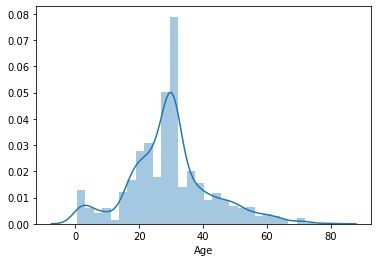

In [55]:
sns.distplot(df['Age'], hist=True)
plt.show()

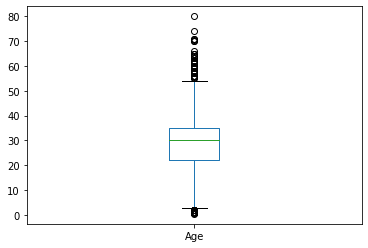

In [23]:
df[['Age']].plot(kind='box')
plt.show()

It's clear that there are some outliers we should explore as we have ages that are 0 (which we may use to feature engineer a "child" class later) as well as some values well into the 80s which we will verify.

In [181]:
mask = (df['Age'] > 65) | (df['Age'] < 1)

In [182]:
mask.sum()

761

There are 15 values that have outliers - let's explore those.

In [63]:
df.loc[df['Name'].str.contains('Baclini'), ['Survived', 'Name', 'Age', 'SibSp', 'Parch']]

,Survived,Name,Age,SibSp,Parch
448,1,"Baclini, Miss. Marie Catherine",5.00,2,1
469,1,"Baclini, Miss. Helene Barbara",0.75,2,1
644,1,"Baclini, Miss. Eugenie",0.75,2,1
858,1,"Baclini, Mrs. Solomon (Latifa Qurban)",24.00,0,3


In [52]:
df[mask]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
33,34,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,10.5000,NaN,S,0,1
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,0,1
96,97,0,1,"Goldschmidt, Mr. George B",male,71.00,0,0,PC 17754,34.6542,A5,C,0,1
116,117,0,3,"Connors, Mr. Patrick",male,70.50,0,0,370369,7.7500,NaN,Q,0,1
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,0,1
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C,1,0
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C,0,1
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.00,0,0,27042,30.0000,A23,S,0,1
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C,1,0
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.00,0,0,C.A. 24580,10.5000,NaN,S,0,1


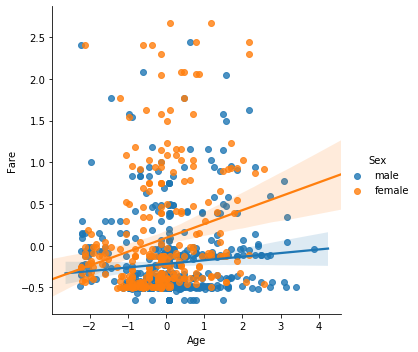

In [185]:
sns.lmplot(x='Age', y='Fare', hue='Sex', data=df.drop(df[df['Fare'] > 3].index))
plt.show()

There is a weak correlation between age and fare for male passengers - female passengers however had a stronger correlation.

In [186]:
df.groupby(['Embarked', 'Survived']).count()['Cabin'].reset_index()

,Embarked,Survived,Cabin
0,C,0,17
1,C,1,52
2,Q,0,2
3,Q,1,2
4,S,0,49
5,S,1,80


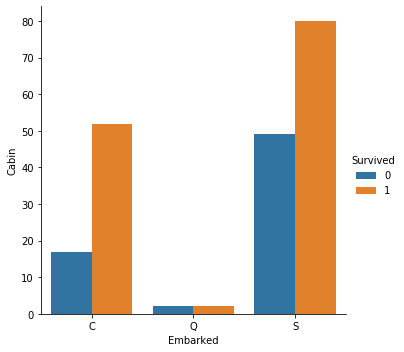

In [187]:
sns.catplot(x='Embarked', y='Cabin', hue='Survived', kind='bar', 
            data=df.groupby(['Embarked', 'Survived']).count()['Cabin'].reset_index())
plt.show()

In [24]:
df.Age.describe()

count    889.000000
mean      29.690446
std       12.981441
min        0.420000
25%       22.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

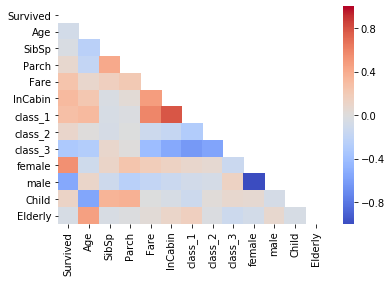

,Survived,Age,SibSp,Parch,Fare,InCabin,class_1,class_2,class_3,female,male,Child,Elderly
Survived,1.000000,-0.085363,-0.034040,0.083151,0.255290,0.313435,0.282368,0.095002,-0.320171,0.541585,-0.541585,0.117741,-0.049861
Age,-0.085363,1.000000,-0.236188,-0.181612,0.086114,0.226576,0.315181,0.008166,-0.277633,-0.108611,0.108611,-0.557166,0.465827
SibSp,-0.034040,-0.236188,1.000000,0.414542,0.160887,-0.038657,-0.052894,-0.056507,0.091515,0.116348,-0.116348,0.353797,-0.043823
Parch,0.083151,-0.181612,0.414542,1.000000,0.217532,0.039101,-0.015809,-0.001278,0.014634,0.247508,-0.247508,0.368162,-0.013175
Fare,0.255290,0.086114,0.160887,0.217532,1.000000,0.480425,0.590576,-0.117609,-0.411932,0.179958,-0.179958,-0.003272,0.033939
InCabin,0.313435,0.226576,-0.038657,0.039101,0.480425,1.000000,0.787224,-0.171006,-0.537496,0.135589,-0.135589,-0.046936,0.102613
class_1,0.282368,0.315181,-0.052894,-0.015809,0.590576,0.787224,1.000000,-0.287653,-0.625395,0.093142,-0.093142,-0.123998,0.158867
class_2,0.095002,0.008166,-0.056507,-0.001278,-0.117609,-0.171006,-0.287653,1.000000,-0.567432,0.066459,-0.066459,0.028213,-0.019723
class_3,-0.320171,-0.277633,0.091515,0.014634,-0.411932,-0.537496,-0.625395,-0.567432,1.000000,-0.134227,0.134227,0.083623,-0.120518
female,0.541585,-0.108611,0.116348,0.247508,0.179958,0.135589,0.093142,0.066459,-0.134227,1.000000,-1.000000,0.068566,-0.082315


In [25]:
sns.heatmap(df_filtered.corr(), mask=np.triu(np.ones_like(df_filtered.corr())), cmap='coolwarm')
plt.show()
df_filtered.corr()

## SKLearn

In [26]:
X = df_filtered.drop('Survived', axis=1)
y = df_filtered['Survived']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=15144)

In [28]:
X_train.head()

,Age,SibSp,Parch,Fare,InCabin,class_1,class_2,class_3,female,male,Child,Elderly
114,17.000000,0,0,14.4583,False,0,0,1,1,0,False,False
793,30.726645,0,0,30.6958,False,1,0,0,0,1,False,False
276,45.000000,0,0,7.7500,False,0,0,1,1,0,False,False
113,20.000000,1,0,9.8250,False,0,0,1,1,0,False,False
800,34.000000,0,0,13.0000,False,0,1,0,0,1,False,False


In [29]:
y_train.head()

114    0
793    0
276    0
113    0
800    0
Name: Survived, dtype: int64

In [35]:
model = RandomForestClassifier(n_jobs=-1)

In [41]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [42]:
model.score(X_test, y_test)

0.8277153558052435

In [61]:
param_grid = {'max_features':['auto'], 
              'n_estimators':[5, 50, 100, 200, 500, 1000], 
              'max_depth':[None, 1, 2, 5, 10],
              'min_samples_leaf':[1, 2, 5],
             'min_weight_fraction_leaf':[0, 0.1, 0.2, 0.5],
             'random_state':[15144]}
gridsearch = GridSearchCV(RandomForestClassifier(n_jobs=-1), param_grid=param_grid, scoring='accuracy')

In [62]:
gridsearch.fit(X_train, y_train)

S:\Code\Anaconda\envs\DataScience\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score...
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid=

In [63]:
gridsearch.best_score_

0.8279742765273312

In [64]:
gridsearch.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0,
 'n_estimators': 50,
 'random_state': 15144}